# Worksheet 21

Name:  Jeremy Bui
UID: U87383281

### Topics

- Logistic Regression
- Gradient Descent

## Logistic Regression

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=1, random_state=0)

# LINE
def generate_line_data():
    # create some space between the classes
    X = np.array(list(filter(lambda x : x[0] - x[1] < -.5 or x[0] - x[1] > .5, t)))
    Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])
    return X, Y

# CIRCLE
def generate_circle_data(t):
    # create some space between the classes
    X = np.array(list(filter(lambda x : (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 < 1 or (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 > 1.5, t)))
    Y = np.array([1 if (x[0] - centers[0][0])**2 + (x[1] - centers[0][1])**2 >= 1 else 0 for x in X])
    return X, Y

# XOR
def generate_xor_data():
    X = np.array([
        [0,0],
        [0,1],
        [1,0],
        [1,1]])
    Y = np.array([x[0]^x[1] for x in X])
    return X, Y

a) Using the above code, generate and plot data that is linearly separable.

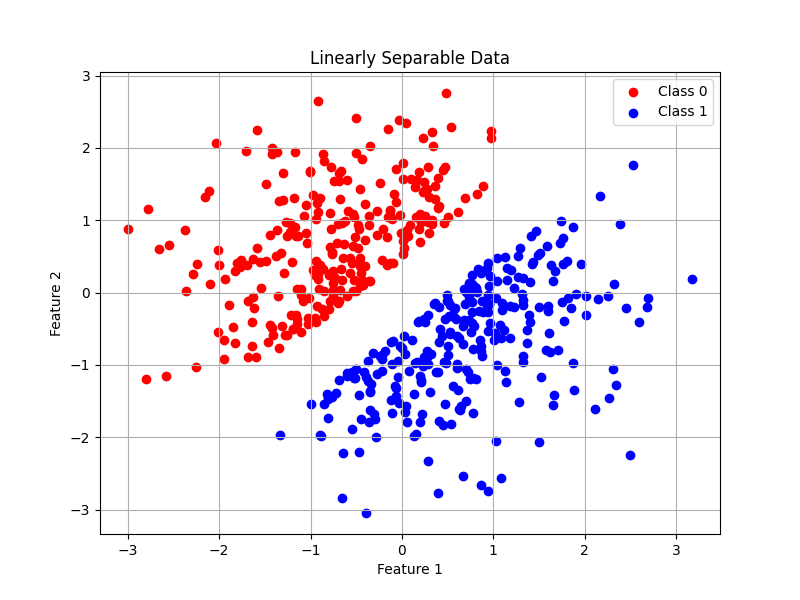

In [10]:
X, Y = generate_line_data()


plt.figure(figsize=(8, 6))
plt.scatter(X[Y == 0][:, 0], X[Y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], color='blue', label='Class 1')
plt.title('Linearly Separable Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

b) Fit a logistic regression model to the data a print out the coefficients.

In [11]:
model = LogisticRegression().fit(X, Y)
coefficients = model.coef_
intercept = model.intercept_

coefficients, intercept


(array([[ 4.11128306, -4.10408124]]), array([0.06146435]))

c) Using the coefficients, plot the line through the scatter plot you created in a). (Note: you need to do some math to get the line in the right form)

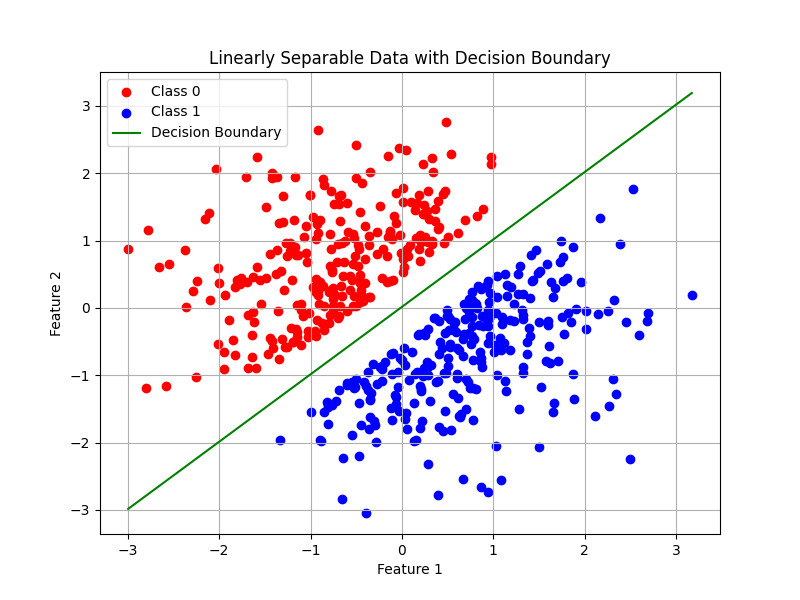

In [12]:
# Decision boundary calculation: x2 = -(coef[0] * x1 + intercept) / coef[1]
x_values = np.array([X[:, 0].min(), X[:, 0].max()])
y_values = -(coefficients[0][0] * x_values + intercept) / coefficients[0][1]

plt.figure(figsize=(8, 6))
plt.scatter(X[Y == 0][:, 0], X[Y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], color='blue', label='Class 1')

plt.plot(x_values, y_values, label='Decision Boundary', color='green')

plt.title('Linearly Separable Data with Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


d) Using the above code, generate and plot the CIRCLE data.

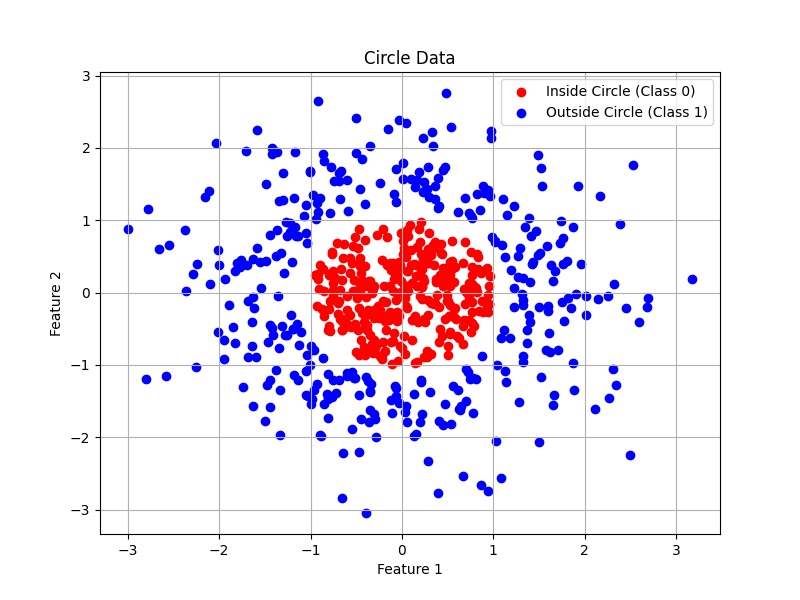

In [13]:
X_circle, Y_circle = generate_circle_data(t)

plt.figure(figsize=(8, 6))
plt.scatter(X_circle[Y_circle == 0][:, 0], X_circle[Y_circle == 0][:, 1], color='red', label='Inside Circle (Class 0)')
plt.scatter(X_circle[Y_circle == 1][:, 0], X_circle[Y_circle == 1][:, 1], color='blue', label='Outside Circle (Class 1)')
plt.title('Circle Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

e) Notice that the equation of an ellipse is of the form $$ax^2 + by^2 = c$$

Fit a logistic regression model to an appropriate transformation of X.

In [14]:
model = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), LogisticRegression()).fit(X_circle, Y_circle)

f) Plot the decision boundary using the code below.

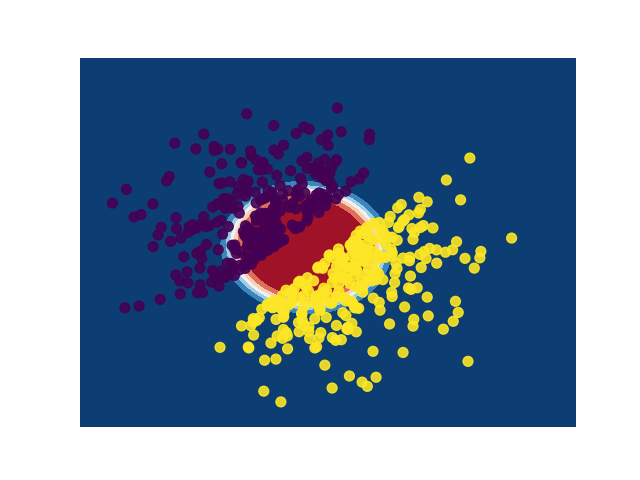

In [15]:
# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

fig, ax = plt.subplots()
A = model.predict_proba(meshData)[:, 1].reshape(xx.shape)
Z = model.predict(meshData).reshape(xx.shape)
ax.contourf(xx, yy, A, cmap="RdBu", vmin=0, vmax=1)
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], c=Y, s=50, alpha=0.9)
plt.show()

g) Plot the XOR data. In this 2D space, the data is not linearly separable, but by introducing a new feature $$x_3 = x_1 * x_2$$

(called an interaction term) we should be able to find a hyperplane that separates the data in 3D. Plot this new dataset in 3D.

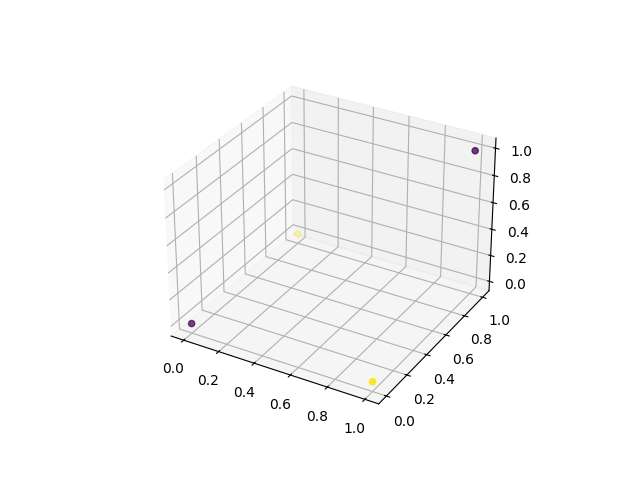

In [16]:
from mpl_toolkits.mplot3d import Axes3D

X_xor, Y_xor = generate_xor_data()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X_xor[:, 0], X_xor[:, 1], X_xor[:, 0] * X_xor[:, 1], c=Y_xor, cmap='viridis')

plt.show()

h) Apply a logistic regression model using the interaction term. Plot the decision boundary.

ValueError: 'color' kwarg must be a color or sequence of color specs.  For a sequence of values to be color-mapped, use the 'c' argument instead.

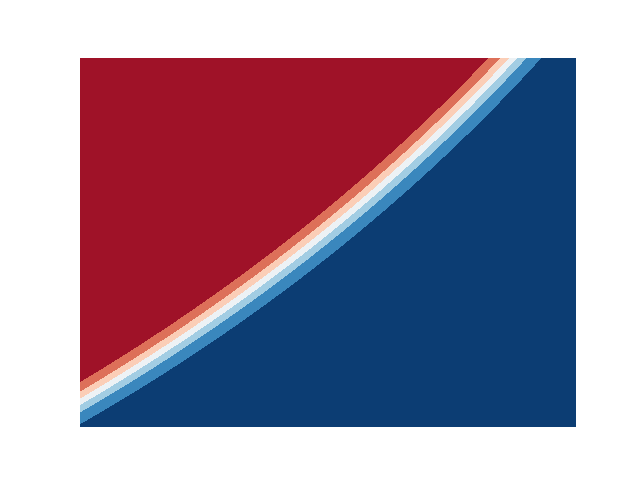

In [17]:
poly = PolynomialFeatures(interaction_only=True)
lr = LogisticRegression(verbose=0)
model = make_pipeline(poly, lr).fit(X, Y)

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
meshData = np.c_[xx.ravel(), yy.ravel()]

fig, ax = plt.subplots()
A = model.predict_proba(meshData)[:, 1].reshape(xx.shape)
Z = model.predict(meshData).reshape(xx.shape)
ax.contourf(xx, yy, A, cmap="RdBu", vmin=0, vmax=1)
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], color=Y, s=50, alpha=0.9)
plt.show()

In [ ]:
%matplotlib widget
for i in range(20000):
    for solver in ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']:
        X_transform = PolynomialFeatures(interaction_only=True, include_bias=False).fit_transform(X)
        model = LogisticRegression(verbose=0, solver=solver, random_state=i, max_iter=10000)
        model.fit(X_transform, Y)
        print(model.score(X_transform, Y))
        if model.score(X_transform, Y) > .75:
            print("random state = ", i)
            print("solver = ", solver)
            break

print(model.coef_)
print(model.intercept_)

xx, yy = np.meshgrid([x / 10 for x in range(-1, 11)], [x / 10 for x in range(-1, 11)])
z = - model.intercept_ / model.coef_[0][2] - model.coef_[0][0] * xx / model.coef_[0][2] - model.coef_[0][1] * yy / model.coef_[0][2]

ax = plt.axes(projection='3d')
ax.scatter3D(X[: , 0], X[: , 1], X[: , 0]* X[: , 1], c=Y)
ax.plot_surface(xx, yy, z, alpha=0.5)
plt.show()

i) Using the code below that generates 3 concentric circles, fit a logisitc regression model to it and plot the decision boundary.

In [ ]:
t, _ = datasets.make_blobs(n_samples=1500, centers=centers, cluster_std=2, random_state=0)

def generate_circles_data(t):
    def label(x):
        if x[0]**2 + x[1]**2 >= 2 and x[0]**2 + x[1]**2 < 8:
            return 1
        if x[0]**2 + x[1]**2 >= 8:
            return 2
        return 0
    X = np.array(list(filter(lambda x : (x[0]**2 + x[1]**2 < 1.8 or x[0]**2 + x[1]**2 > 2.2) and (x[0]**2 + x[1]**2 < 7.8 or x[0]**2 + x[1]**2 > 8.2), t)))
    Y = np.array([label(x) for x in X])
    return X, Y

X_circles, Y_circles = generate_circles_data(t)

# Fit a logistic regression model using polynomial features
poly = PolynomialFeatures(2)
lr = LogisticRegression(verbose=0, multi_class='multinomial', solver='lbfgs', max_iter=10000)
model_circles = make_pipeline(poly, lr).fit(X_circles, Y_circles)

# Create a mesh to plot the decision boundary
h = .02
x_min, x_max = X_circles[:, 0].min() - 1, X_circles[:, 0].max() + 1
y_min, y_max = X_circles[:, 1].min() - 1, X_circles[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict over the mesh grid
meshData = np.c_[xx.ravel(), yy.ravel()]
Z = model_circles.predict(meshData).reshape(xx.shape)

fig, ax = plt.subplots()
ax.contourf(xx, yy, Z, cmap="viridis", alpha=0.8)
ax.scatter(X_circles[:, 0], X_circles[:, 1], c=Y_circles, cmap='viridis', edgecolors='k', s=50)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_title("Logistic Regression with Polynomial Features on 3 Concentric Circles")
plt.show()


## Gradient Descent

Recall in Linear Regression we are trying to find the line $$y = X \beta$$ that minimizes the sum of square distances between the predicted `y` and the `y` we observed in our dataset:

$$\mathcal{L}(\mathbf{\beta}) = \Vert \mathbf{y} - X\mathbf{\beta} \Vert^2$$

We were able to find a global minimum to this loss function but we will try to apply gradient descent to find that same solution.

a) Implement the `loss` function to complete the code and plot the loss as a function of beta.

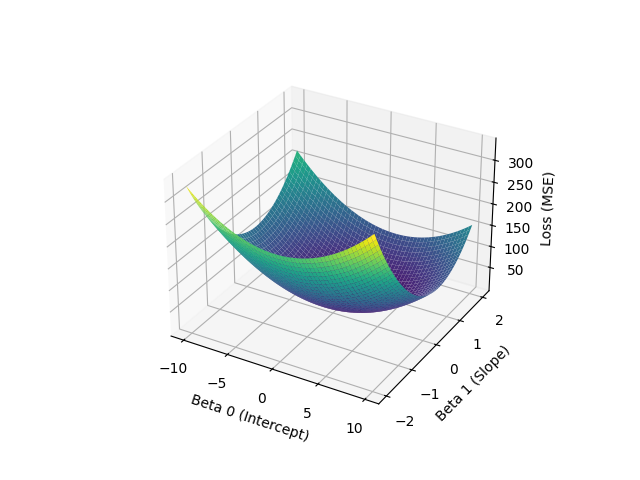

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Given data and setup
beta = np.array([1, 0.5])
xlin = -10.0 + 20.0 * np.random.random(100)
X = np.column_stack([np.ones((len(xlin), 1)), xlin])
y = beta[0] + (beta[1] * xlin) + np.random.randn(100)

# Function to calculate MSE
def mse_loss(beta, X, y):
    y_pred = X @ beta
    return np.mean((y - y_pred) ** 2)

# Generating a range of beta values for visualization
beta0_range = np.linspace(-10, 10, 400)
beta1_range = np.linspace(-2, 2, 400)
Beta0, Beta1 = np.meshgrid(beta0_range, beta1_range)
loss_surface = np.zeros_like(Beta0)

# Calculating loss for each combination of beta0 and beta1
for i in range(Beta0.shape[0]):
    for j in range(Beta0.shape[1]):
        b = np.array([Beta0[i, j], Beta1[i, j]])
        loss_surface[i, j] = mse_loss(b, X, y)

# Plotting the loss surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Beta0, Beta1, loss_surface, cmap='viridis')
ax.set_xlabel('Beta 0 (Intercept)')
ax.set_ylabel('Beta 1 (Slope)')
ax.set_zlabel('Loss (MSE)')
plt.show()


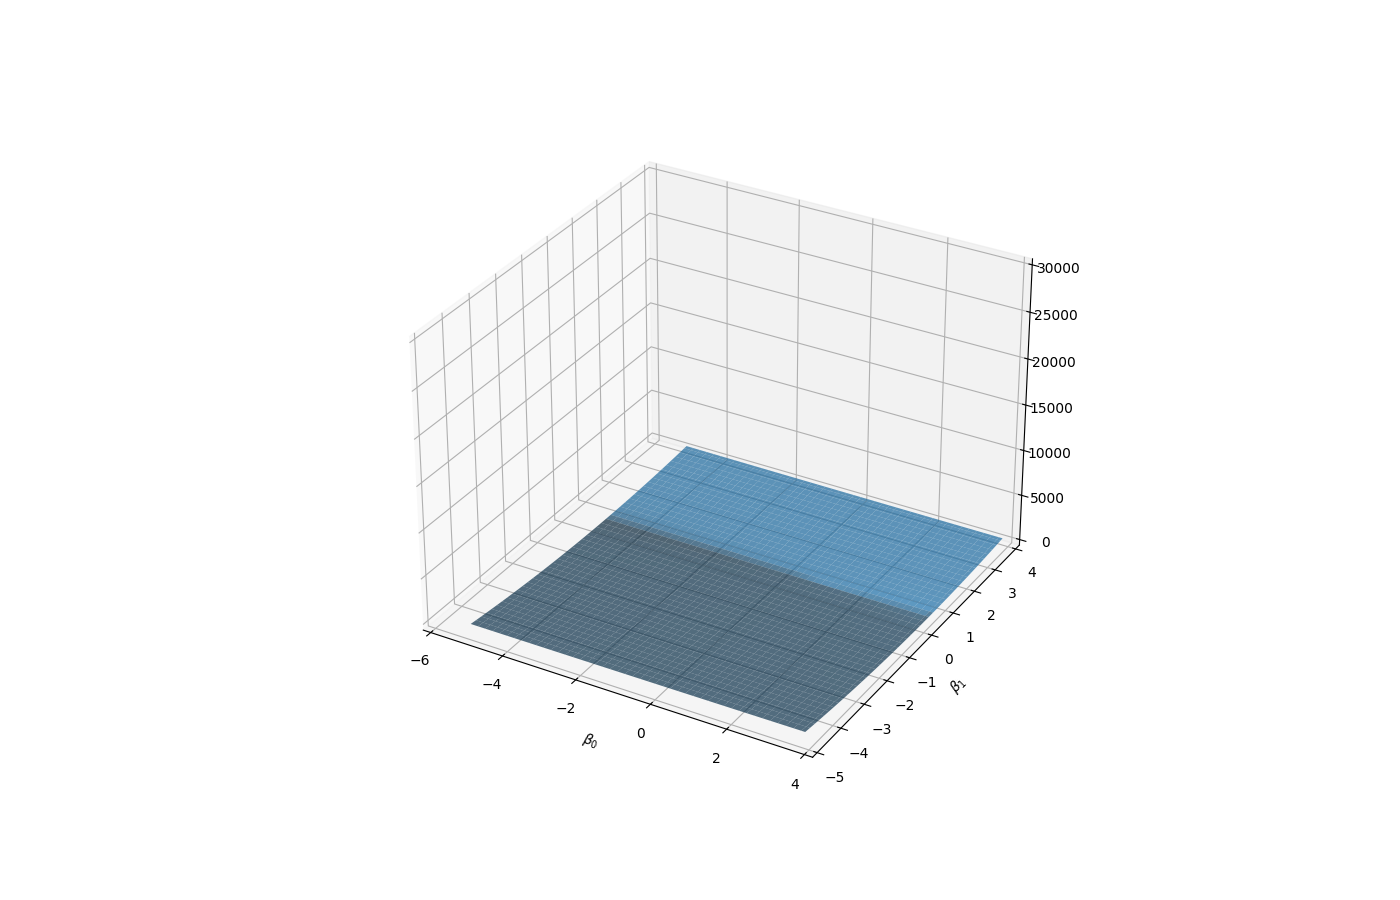

In [19]:
b0 = np.arange(-5, 4, 0.1)
b1 = np.arange(-5, 4, 0.1)
b0, b1 = np.meshgrid(b0, b1)

def loss(X, y, beta):
    y_pred = X @ beta
    return np.mean((y - y_pred) ** 2)

def get_cost(B0, B1):
    res = []
    for b0, b1 in zip(B0, B1):
        line = []
        for i in range(len(b0)):
            beta = np.array([b0[i], b1[i]])
            line.append(loss(X, y, beta))
        res.append(line)
    return np.array(res)

cost = get_cost(b0, b1)
 
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.set_xlim(-6, 4)
ax.set_xlabel(r'$\beta_0$')
ax.set_ylabel(r'$\beta_1$')
ax.set_ylim(-5, 4)
ax.set_zlim(0, 30000)

# Creating plot
ax.plot_surface(b0, b1, cost, alpha=.7)
 
# show plot
plt.show()

Since the loss is

$$\mathcal{L}(\mathbf{\beta}) = \Vert \mathbf{y} - X\mathbf{\beta} \Vert^2 = \beta^T X^T X \beta - 2\mathbf{\beta}^TX^T\mathbf{y}  + \mathbf{y}^T\mathbf{y}$$

The gradient is

$$\nabla_\beta \mathcal{L}(\mathbf{\beta}) = 2X^T X \beta - 2X^T\mathbf{y}$$

b) Implement the gradient function below and complete the gradient descent algorithm

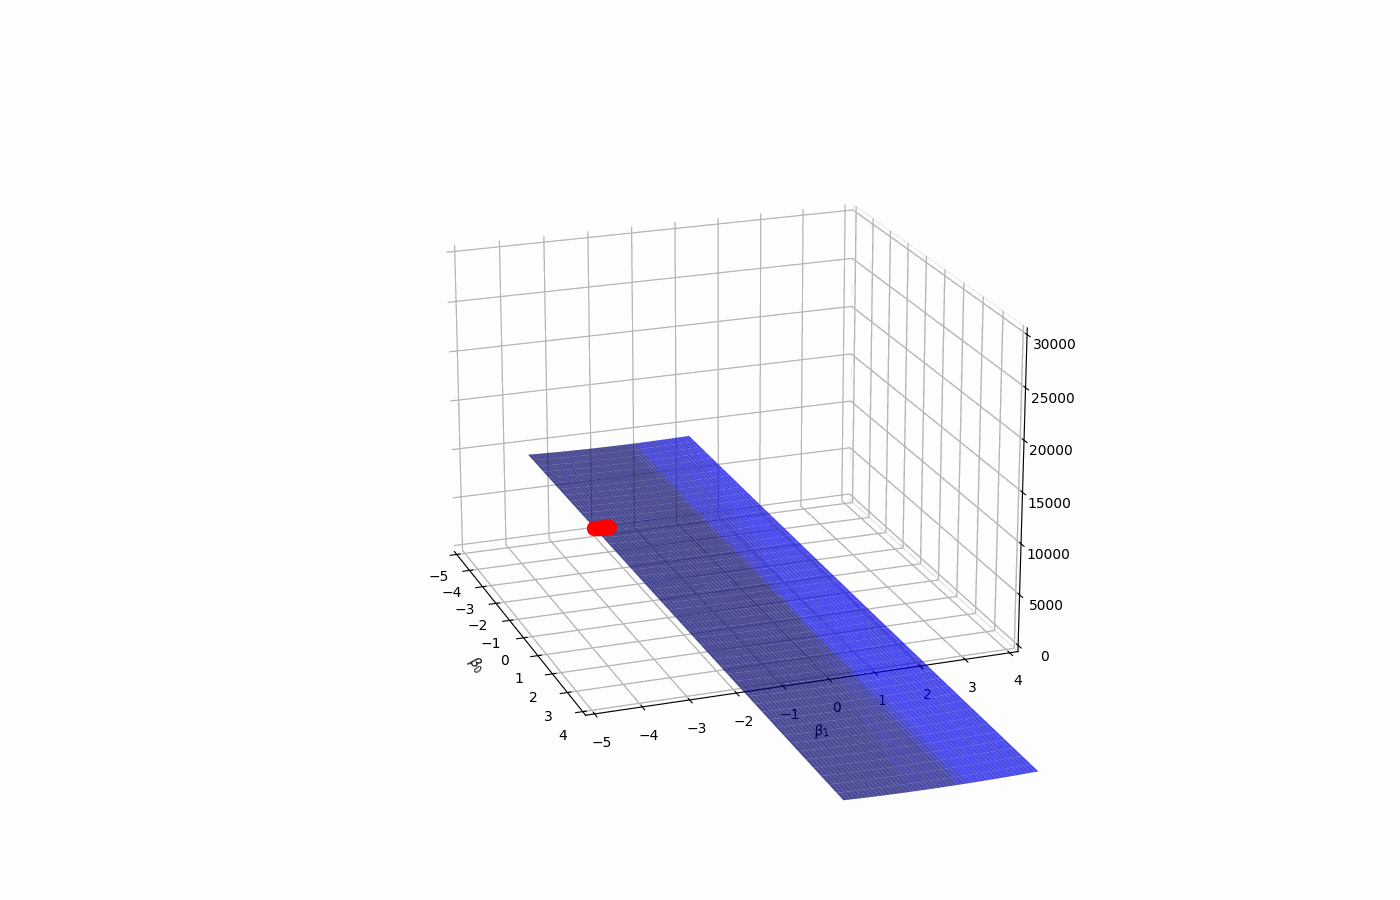

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image as im
from IPython.display import Image
TEMPFILE = "temp.png"

def loss(X, y, beta):
    predictions = X @ beta
    return np.mean((y - predictions) ** 2)

def gradient(X, y, beta):
    n = len(y)
    predictions = X @ beta
    return -2/n * X.T @ (y - predictions)

def snap(betas, losses, b0, b1, cost):
    fig = plt.figure(figsize=(14, 9))
    ax = plt.axes(projection='3d')
    ax.view_init(20, -20)
    ax.set_xlim(-5, 4)
    ax.set_ylim(-5, 4)
    ax.set_zlim(0, 30000)
    ax.set_xlabel(r'$\beta_0$')
    ax.set_ylabel(r'$\beta_1$')
    ax.plot_surface(b0, b1, cost, color='b', alpha=.7)
    ax.plot(np.array(betas)[:,0], np.array(betas)[:,1], losses, 'o-', c='r', markersize=10, zorder=10)
    fig.savefig(TEMPFILE)
    plt.close()
    return im.open(TEMPFILE)

def gradient_descent(X, y, beta_hat, learning_rate, epochs, images, b0, b1, cost):
    losses = [loss(X, y, beta_hat)]
    betas = [beta_hat]

    for _ in range(epochs):
        grad = gradient(X, y, beta_hat)
        beta_hat = beta_hat - learning_rate * grad
        losses.append(loss(X, y, beta_hat))
        betas.append(beta_hat)
        images.append(snap(betas, losses, b0, b1, cost))

    return np.array(betas), np.array(losses)

beta_start = np.array([-5, -2])
learning_rate = 0.0002
images = []
betas, losses = gradient_descent(X, y, beta_start, learning_rate, 10, images, Beta0, Beta1, loss_surface)

images[0].save(
    'gd.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=500
)
Image(filename='gd.gif')


c) Use the code above to create an animation of the linear model learned at every epoch.

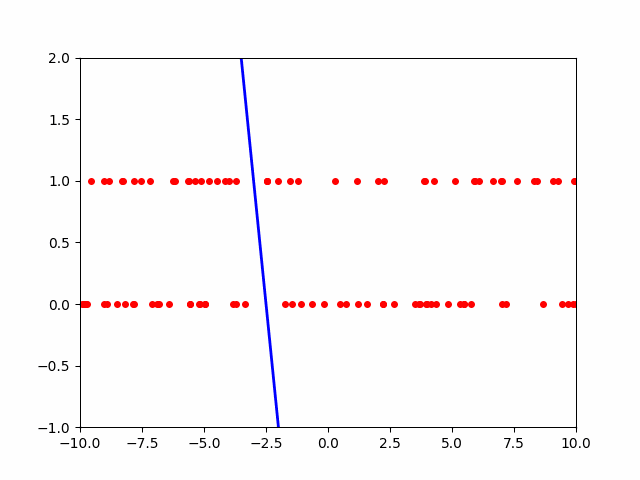

In [27]:
import numpy as np
from PIL import Image as PILImage  # Alias PIL Image
import matplotlib.pyplot as plt
import io

def snap_model(beta, xlin, y):
    xplot = np.linspace(-10, 10, 50)
    yestplot = beta[0] + beta[1] * xplot
    fig, ax = plt.subplots()
    ax.plot(xplot, yestplot, 'b-', lw=2)
    ax.plot(xlin, y, 'ro', markersize=4)
    ax.set_xlim(-10, 10)
    ax.set_ylim(min(y) - 1, max(y) + 1)

    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    plt.close(fig)
    buf.seek(0)
    return PILImage.open(buf)  

def gradient_descent(X, y, beta_hat, learning_rate, epochs, images):
    losses = [loss(X, y, beta_hat)]
    betas = [beta_hat]

    for _ in range(epochs):
        grad = gradient(X, y, beta_hat)
        beta_hat = beta_hat - learning_rate * grad
        losses.append(loss(X, y, beta_hat))
        betas.append(beta_hat)
        images.append(snap_model(beta_hat, xlin, y))
        
    return np.array(betas), np.array(losses)

beta_start = np.array([-5, -2], dtype=float)  
learning_rate = 0.0002
images = []
betas, losses = gradient_descent(X, y, beta_start, learning_rate, 100, images)

images[0].save(
    'model.gif',
    save_all=True,
    append_images=images[1:],
    optimize=False,
    duration=200,
    loop=0
)

from IPython.display import Image
display(Image(filename='model.gif'))


In logistic regression, the `loss` is the negative log-likelihood

$$ \mathcal{l}(\mathbf{\beta}) = - \frac{1}{N} \sum_{i=1}^{N} y_i \log(\sigma(x_i \beta)) + (1 - y_i)\log(1 - \sigma(x_i \beta))$$

the gradient of which is:

$$\nabla_\beta \mathcal{l}(\mathbf{\beta}) = \frac{1}{N} \sum_{i=1}^{N} x_i (y_i - \sigma(x_i \beta)) $$

d) Plot the loss as a function of b.

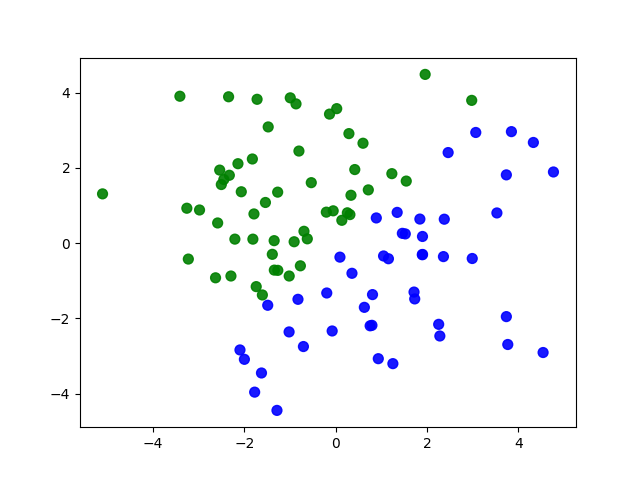

In [22]:
%matplotlib widget
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=100, centers=centers, cluster_std=2, random_state=0)

# LINE
def generate_line_data():
    # create some space between the classes
    X = t
    Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])
    return X, Y

X, y = generate_line_data()

cs = np.array([x for x in 'gb'])
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], color=cs[y].tolist(), s=50, alpha=0.9)
plt.show()

C:\Users\jerem\AppData\Local\Temp\ipykernel_22004\240986384.py:17: RuntimeWarning: divide by zero encountered in log
  return -np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))
C:\Users\jerem\AppData\Local\Temp\ipykernel_22004\240986384.py:17: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))


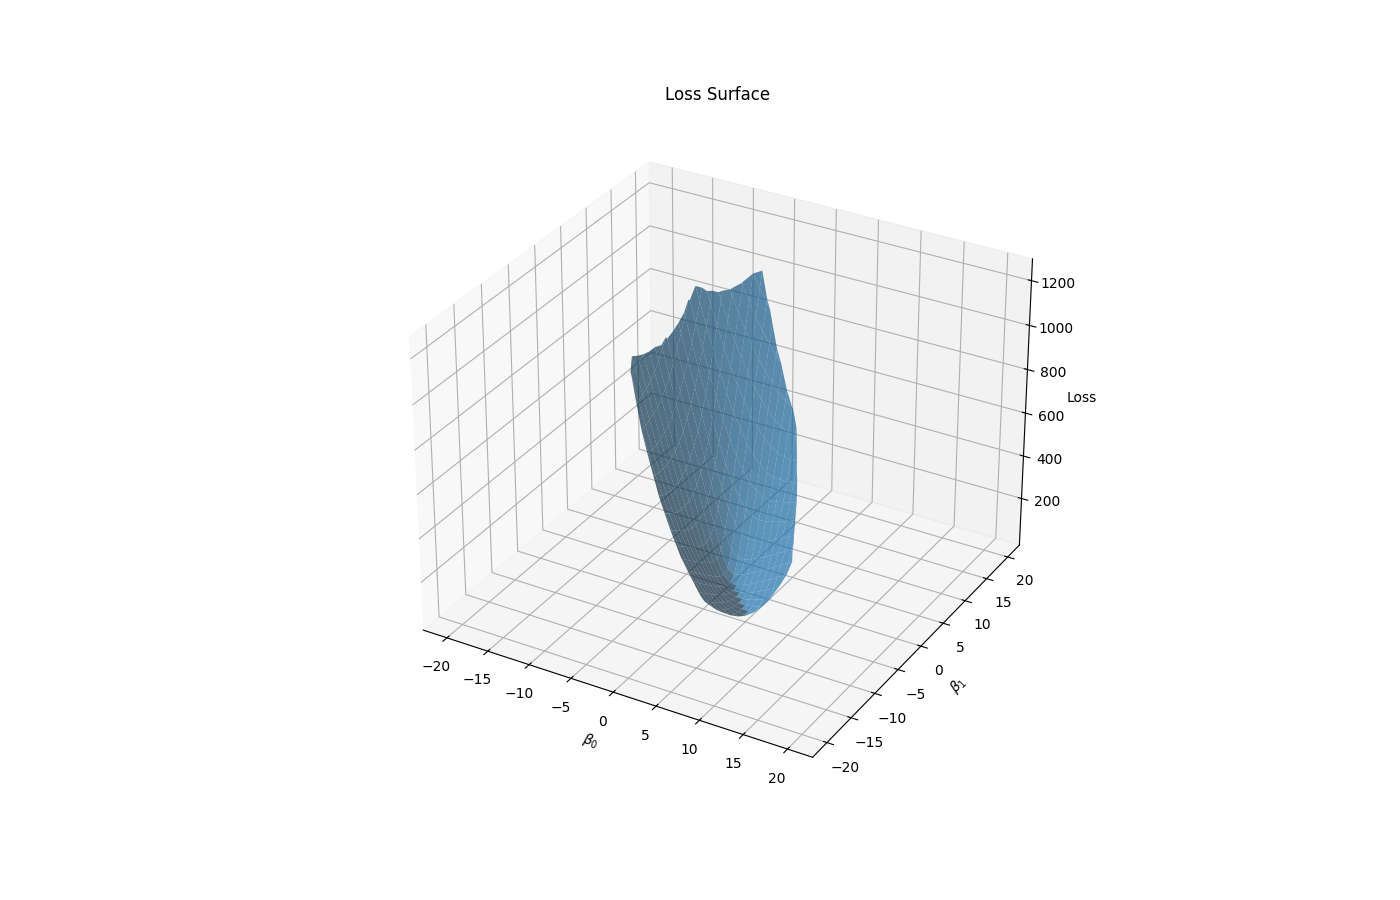

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sklearn.datasets as datasets

centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=100, centers=centers, cluster_std=2, random_state=0)
X = t
y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def loss(X, y, beta):
    z = np.dot(X, beta)
    p = sigmoid(z)
    return -np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))

b0 = np.arange(-20, 20, 0.1)
b1 = np.arange(-20, 20, 0.1)
B0, B1 = np.meshgrid(b0, b1)

def get_cost(B0, B1, X, y):
    costs = np.zeros_like(B0)
    for i in range(B0.shape[0]):
        for j in range(B0.shape[1]):
            beta = np.array([B0[i, j], B1[i, j]])
            costs[i, j] = loss(X, y, beta)
    return costs

cost = get_cost(B0, B1, X, y)

fig = plt.figure(figsize=(14, 9))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(B0, B1, cost, alpha=0.7)
ax.set_xlabel(r'$\beta_0$')
ax.set_ylabel(r'$\beta_1$')
ax.set_zlabel('Loss')
ax.set_title('Loss Surface')
plt.show()


e) Plot the loss at each iteration of the gradient descent algorithm.

In [ ]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt

TEMPFILE = "temp.png"

def snap(betas, losses):
    # Creating figure
    fig = plt.figure(figsize =(14, 9))
    ax = plt.axes(projection ='3d')
    ax.view_init(10, 10)
    ax.set_xlabel(r'$\beta_0$')
    ax.set_ylabel(r'$\beta_1$')
    ax.set_ylim(-20, 20)
    ax.set_zlim(0, 10)

    # Creating plot
    ax.plot_surface(b0, b1, cost, color='b', alpha=.7)
    ax.plot(np.array(betas)[:,0], np.array(betas)[:,1], losses, 'o-', c='r', markersize=10, zorder=10)
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))


def gradient(X, y, beta):
    predictions = sigmoid(X @ beta)
    return X.T @ (predictions - y) / len(y)


def gradient_descent(X, y, beta_hat, learning_rate, epochs, images):
    losses = [loss(X, y, beta_hat)]
    betas = [beta_hat]

    for _ in range(epochs):
        images.append(snap(betas, losses))
        beta_hat = beta_hat - learning_rate * gradient(X, y, beta_hat)

        losses.append(loss(X, y, beta_hat))
        betas.append(beta_hat)
        
    return np.array(betas), np.array(losses)


beta_start = np.array([-5, -2])
learning_rate = 0.1
images = []
betas, losses = gradient_descent(X, y, beta_start, learning_rate, 10, images)

images[0].save(
    'gd_logit.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=500
)

f) Create an animation of the logistic regression fit at every epoch.

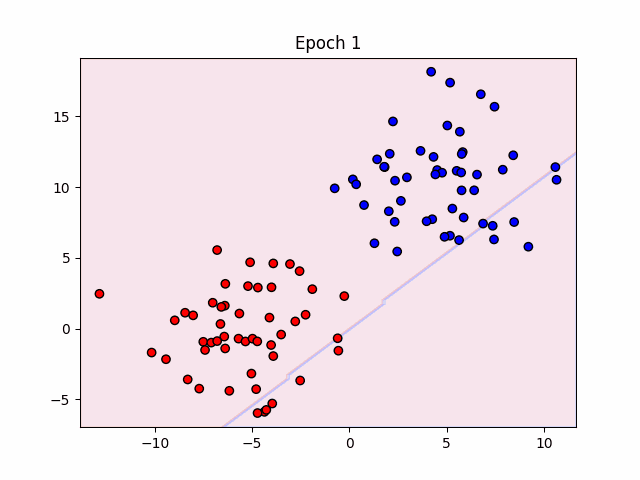

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from matplotlib.colors import ListedColormap
from PIL import Image

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def plot_decision_boundary(X, y, beta, ax):
    x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = sigmoid(beta[0] + beta[1] * xx + beta[2] * yy)
    Z = (Z > 0.5).astype(int)
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    ax.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.3)
    ax.scatter(X[:, 1], X[:, 2], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']), edgecolors='k')

def gradient_descent_animation(X, y, beta_hat, learning_rate, epochs):
    images = []
    for _ in range(epochs):
        grad = X.T @ (sigmoid(X @ beta_hat) - y) / len(y)
        beta_hat -= learning_rate * grad
        fig, ax = plt.subplots()
        plot_decision_boundary(X, y, beta_hat, ax)
        ax.set_title(f'Epoch {_+1}')
        filename = f'temp{_}.png'
        plt.savefig(filename)
        plt.close()
        images.append(Image.open(filename))
    return images

centers = [[-5, 0], [5, 10]]
X, y = make_blobs(n_samples=100, centers=centers, random_state=42, cluster_std=3)
X = np.column_stack([np.ones(X.shape[0]), X]) 

beta_start = np.array([0.0, 1.0, -1.0])
learning_rate = 0.01
epochs = 50

images = gradient_descent_animation(X, y, beta_start, learning_rate, epochs)

images[0].save('logit_fit.gif', save_all=True, append_images=images[1:], optimize=False, duration=100, loop=0)
from IPython.display import Image
display(Image(filename='logit_fit.gif'))


g) Modify the above code to evaluate the gradient on a random batch of the data. Overlay the true loss curve and the approximation of the loss in your animation.

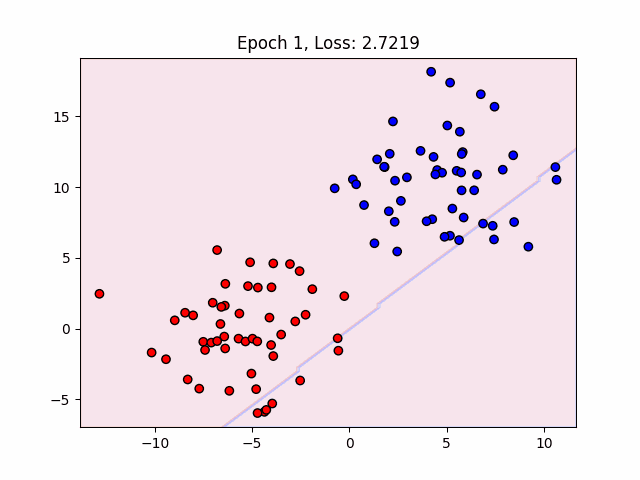

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from matplotlib.colors import ListedColormap
from PIL import Image, ImageDraw, ImageFont
import io

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def plot_decision_boundary(X, y, beta, ax, title):
    x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = sigmoid(beta[0] + beta[1] * xx + beta[2] * yy)
    Z = (Z > 0.5).astype(int)
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    ax.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.3)
    ax.scatter(X[:, 1], X[:, 2], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']), edgecolors='k')
    ax.set_title(title)

def loss(X, y, beta):
    predictions = sigmoid(X @ beta)
    return -np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions)) / len(y)

def gradient_descent_animation(X, y, beta_hat, learning_rate, epochs, batch_size):
    images = []
    full_losses = [loss(X, y, beta_hat)]  
    
    for epoch in range(epochs):
        idx = np.random.choice(len(y), batch_size, replace=False)
        X_batch, y_batch = X[idx], y[idx]
        
        # Calculate gradient on the batch
        grad = X_batch.T @ (sigmoid(X_batch @ beta_hat) - y_batch) / batch_size
        beta_hat -= learning_rate * grad
        
        # Calculate loss on full dataset and batch for comparison
        current_loss = loss(X, y, beta_hat)
        full_losses.append(current_loss)
        
        # Visualize decision boundary and losses
        fig, ax = plt.subplots()
        plot_decision_boundary(X, y, beta_hat, ax, f'Epoch {epoch+1}, Loss: {current_loss:.4f}')
        
        # Convert plot to image
        buf = io.BytesIO()
        plt.savefig(buf, format='png')
        plt.close(fig)
        buf.seek(0)
        img = Image.open(buf)
        
        # Draw true loss on the image for overlay
        draw = ImageDraw.Draw(img)
        draw.text((10, 10), f'True Loss: {full_losses[-1]:.4f}', fill=(255, 255, 255))
        
        images.append(img)
    
    return images

# Example usage
beta_start = np.array([0.0, 1.0, -1.0])
learning_rate = 0.01
epochs = 50
batch_size = 20

images = gradient_descent_animation(X, y, beta_start, learning_rate, epochs, batch_size)

# Saving the images as a GIF
images[0].save('logit_fit.gif', save_all=True, append_images=images[1:], optimize=False, duration=200, loop=0)

# Display the GIF
from IPython.display import Image
display(Image(filename='logit_fit.gif'))


h) Below is a sandox where you can get intuition about how to tune gradient descent parameters:

In [ ]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt

TEMPFILE = "temp.png"

def snap(x, y, pts, losses, grad):
    fig = plt.figure(figsize =(14, 9))
    ax = plt.axes(projection ='3d')
    ax.view_init(20, -20)
    ax.plot_surface(x, y, loss(np.array([x, y])), color='r', alpha=.4)
    ax.plot(np.array(pts)[:,0], np.array(pts)[:,1], losses, 'o-', c='b', markersize=10, zorder=10)
    ax.plot(np.array(pts)[-1,0], np.array(pts)[-1,1], -1, 'o-', c='b', alpha=.5, markersize=7, zorder=10)
    
    # Plot Gradient Vector
    X, Y, Z = [pts[-1][0]], [pts[-1][1]], [-1]
    U, V, W = [-grad[0]], [-grad[1]], [0]
    ax.quiver(X, Y, Z, U, V, W, color='g')
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))

def loss(x):
    return np.sin(sum(x**2)) # change this

def gradient(x):
    return 2 * x * np.cos(sum(x**2)) # change this

def gradient_descent(x, y, init, learning_rate, epochs):
    images, losses, pts = [], [loss(init)], [init]
    for _ in range(epochs):
        grad = gradient(init)
        images.append(snap(x, y, pts, losses, grad))
        init = init - learning_rate * grad
        losses.append(loss(init))
        pts.append(init)
    return images

init = np.array([-.5, -.5]) # change this
learning_rate = 1.394 # change this
x, y = np.meshgrid(np.arange(-2, 2, 0.1), np.arange(-2, 2, 0.1)) # change this
images = gradient_descent(x, y, init, learning_rate, 12)

images[0].save(
    'gradient_descent.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=500
)